## Maximum Likelihood Estimation

This notebook assumes the data is a standard continuous normal distribution. The number of random samples, mean, and standard deviation of the distribution can be set in lines 7-9 in code cell 1.

The function `gaussian` calculates the negative log likelihood given the random samples and the initial predicted mean and standard deviations defined in initParams.

The key to the whole program is the scipy function `minimize`. It is a regular optimization function and more information about it can be found [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html).

**Note:** the method can be a lot of different options, all different mathematical optimization techniques.


#### Questions:
1. If everything is working, we would expect more accurate $\mu^*$ and $\sigma^*$ predictions with more random samples. Think about why this is.
2. What happens when the initial parameter guesses are extremely off? What about when they're extremely close? How does this impact the number of samples?
3. Break down each line in the `gaussian` function. Knowing what you know about MLE, what do you think the function `stats.norm.logpdf` does?

# **RESPONSE**
1. $\mu^*$ and $\sigma^*$ predictions increase accuracy with more random samples because it is able to sample & learn from a wider set of data, therefore make a better prediction on what the standard deviation and mean is while being resistant to the influence of highly deviating and or the noise from random datapoints.
2. If initial parameter guesses are extremely off, it takes more samples to adjust the parameters to more accurate values (model must take more steps/iterations to reach accurate values  since initial value was far from actual so learning is slow). If initial parameter guesses are close to actual parameter values, it takes less samples to adjust the parameters to accurate values (model only needs to take a few steps/iterations to reach accurate values since initial value was already close to actual so learning is fast)
3. Code explanations...

`mean = params[0]`: Params is a collection type object. Get 1st element in collection which is the input mean value.

`sd = params[1]`: Params is a collection type object. Get 2nd element in collection which is the standard deviation value.

 `-np.sum()`: Most optimization functions e.g. gradient descent, finds the minima, so we take negative natural logarithm so that max likelihood value becomes the minimum value.

 `stats.norm.logpdf(sample_data, loc=mean, scale=sd)`: Use logarithm of the probability density function (PDF) of a normal distribution. Given each data x=sample_data overlaid with a normal distribution curve that has loc/μ = mean & standard deviation/σ = sd, find likelihood of data on this normal distribution curve.

`return nll`: Return negative log likelihood value of `sample_data`

In [46]:
from scipy import stats
import numpy as np
from scipy.optimize import minimize
np.random.seed(1)


samples = 100
mu      = 0
sigma   = 3


#  Take random sample from the distribution of data (normal dist in this case)
sample_data = np.random.normal(loc=mu, scale=sigma, size=samples)

def gaussian(params):
    mean = params[0]
    sd = params[1]

    # Calculate negative log likelihood
    nll = -np.sum(stats.norm.logpdf(sample_data, loc=mean, scale=sd))

    return nll


initParams = [0, 3]

results = minimize(gaussian, initParams, method='Nelder-Mead')


print('mean*  = {:.3f} std*  = {:.3f}'.format(results.x[0],results.x[1]))
print('mean   = {:.3f} std   = {:.3f}'.format(mu, sigma))

mean*  = 0.182 std*  = 2.656
mean   = 0.000 std   = 3.000


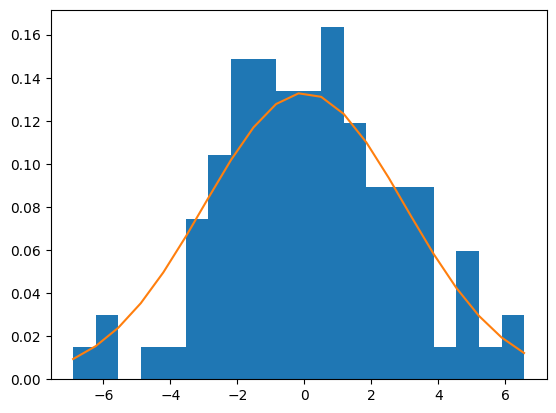

In [47]:
import matplotlib.pyplot as plt

def normal_dist(inp, mean, std):
    return 1./(np.sqrt(2.*np.pi)*std)*np.exp(-np.power((inp - mean)/std, 2.)/2)

x = np.arange(-10, 10, 0.1)
y = normal_dist(x, mu, sigma)

num_bins = 20

count, bins, ignored = plt.hist(sample_data, bins=num_bins, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ))
plt.show()

# **Random data from Logistic distribution**

In [48]:
samples = 100
mu      = 0
sigma   = 3


#  Take random sample from the distribution of data (logistic dist in this case)
sample_data = np.random.logistic(loc=mu, scale=sigma, size=samples)

def logistic(params):
    mean = params[0]
    sd = params[1]
    # Ensure scale remains positive
    if sd <= 0:
        return np.inf
    # Calculate negative log likelihood
    nll = -np.sum(stats.logistic.logpdf(sample_data, loc=mean, scale=sd))

    return nll


initParams = [0, 3]

results = minimize(logistic, initParams, method='Nelder-Mead')


print('mean*  = {:.3f} std*  = {:.3f}'.format(results.x[0],results.x[1]))
print('mean   = {:.3f} std   = {:.3f}'.format(mu, sigma))

mean*  = 0.077 std*  = 3.237
mean   = 0.000 std   = 3.000


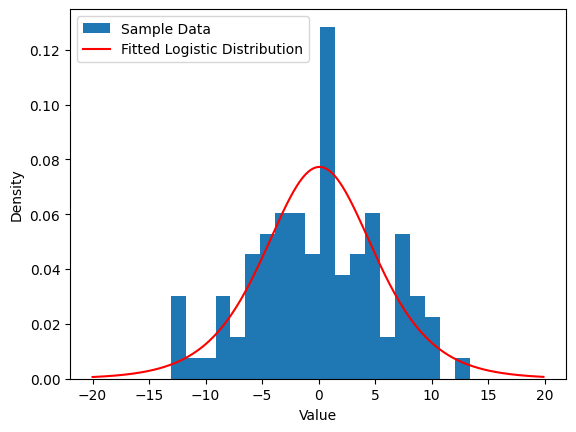

In [50]:
# Plot histogram and fitted logistic distribution
x = np.arange(-20, 20, 0.1) # account for showing longer tails
y = stats.logistic.pdf(x, loc=results.x[0], scale=results.x[1]) # Get estimated mean & standard deviation

num_bins = 20
plt.hist(sample_data, bins=num_bins, density=True, label="Sample Data")
plt.plot(x, y, 'r-', label="Fitted Logistic Distribution")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.show()